## Importing libraries

In [186]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from keras import regularizers
import os

import pandas as pd
import glob 
import scipy.io.wavfile
import sys

In [190]:
mylist= os.listdir('dataset/')
print(len(mylist))

## Plotting audio file's waveform and spectrogram

In [201]:
data, sampling_rate = librosa.load('audiodata/03-01-01-01-01-01-01.wav')
print(data, sampling_rate)

[ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09 ...  4.8083174e-14
 -9.6233243e-15  2.8714739e-14] 22050


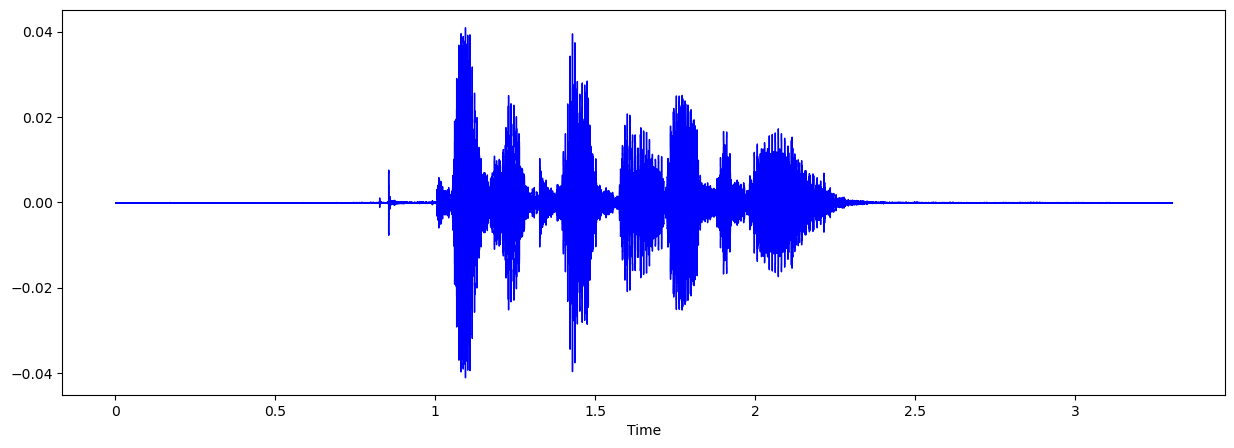

In [202]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate, color="blue")

## Setting the labels

In [204]:
feeling_list=[]
for item in mylist:
    #RAVDESS
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        feeling_list.append('male_fearful')
    #SAVEE
    elif item[3]=='a':
        feeling_list.append('male_angry')
    elif item[3]=='f':
        feeling_list.append('male_fearful')
    elif item[3]=='h':
        feeling_list.append('male_happy')
    elif item[3]=='s':
        feeling_list.append('male_sad')
    #TESS
    elif item[-5]=='r':
        feeling_list.append('female_fearful')
    elif item[-5]=='d':
        feeling_list.append('female_sad')
    elif item[-6:-4]=='ry':
        feeling_list.append('female_angry')
    elif item[-6:-4]=='py':
        feeling_list.append('female_happy')
    


In [205]:
labels = pd.DataFrame(feeling_list)

## Extracting features of audio files using librosa

In [211]:
df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    X, sample_rate = librosa.load('dataset/'+y, offset=0.5, duration=2.5, sr=22050*2, res_type='kaiser_fast')
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    df.loc[bookmark] = [feature]
    bookmark=bookmark+1        

In [268]:
df[0:5]

,feature
0,"[-70.26808, -70.26808, -70.26808, -70.26808, -..."
1,"[-65.707375, -65.707375, -63.11476, -61.5191, ..."
2,"[-65.48282, -65.48282, -65.48282, -65.48282, -..."
3,"[-64.52863, -64.52863, -64.52863, -64.52863, -..."
4,"[-63.64624, -59.995125, -61.87015, -67.49628, ..."


In [213]:
df3 = pd.DataFrame(df['feature'].values.tolist())
newdf = pd.concat([df3,labels], axis=1)
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [216]:
rnewdf[0:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,-70.268082,...,-57.447964,-58.897030,-58.751503,-57.406185,-60.078960,-63.427284,-62.639057,-61.242519,-61.356304,male_calm
1,-65.707375,-65.707375,-63.114761,-61.519100,-61.097507,-63.424744,-63.720127,-56.854958,-55.169304,-54.640343,...,-39.792603,-40.614014,-41.209988,-41.439613,-43.994671,-49.399967,-50.591972,-49.112217,-48.155739,female_calm
2,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,-65.482819,...,-31.348972,-34.310616,-35.803104,-35.938644,-37.633038,-40.119911,-41.663399,-41.552986,-41.974155,male_calm
3,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-64.528633,-65.928391,...,-48.674786,-48.596626,-47.603218,-43.049660,-42.660038,-43.189026,-44.001690,-43.328537,-42.985413,female_calm
4,-63.646240,-59.995125,-61.870152,-67.496277,-71.072220,-65.680321,-63.394951,-65.503853,-61.858971,-60.007893,...,-39.072914,-41.896790,-40.866905,-38.293262,-36.375126,-37.914906,-40.027390,-43.315861,-44.848801,male_calm


In [217]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[1:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
1210,-21.588478,-25.198570,-30.031208,-28.793657,-28.773302,-27.688683,-26.390787,-25.712395,-24.792484,-23.356050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_happy
60,-50.159523,-53.069496,-57.424614,-60.286369,-63.514866,-59.823421,-59.656052,-60.265438,-60.922611,-63.632805,...,-66.580559,-65.908928,-65.688370,-59.147831,-57.583408,-60.386532,-62.520874,-63.577370,-65.219269,male_calm
1125,-20.703493,-21.761473,-27.797102,-27.891850,-26.241699,-26.922325,-29.023359,-31.303963,-32.317612,-32.462669,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_fearful
585,-50.324631,-47.099712,-46.178219,-48.906540,-49.008896,-46.791763,-46.070904,-49.244804,-49.854084,-48.207420,...,-33.916756,-34.232121,-36.540989,-37.225910,-36.283936,-37.516598,-38.179085,-39.819908,-41.910019,female_angry
1220,-16.659016,-20.200500,-33.272308,-34.852547,-33.434727,-32.437862,-31.626930,-32.025143,-32.457619,-32.805557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_angry
1251,-18.865078,-22.211216,-26.732943,-26.587528,-26.320589,-26.901873,-27.611410,-28.305010,-28.986416,-27.109301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_sad
1992,-12.555882,-15.931522,-26.742476,-27.051434,-28.330973,-28.810091,-29.191673,-28.707876,-27.747211,-27.410702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_angry
1486,-18.524853,-20.214642,-22.615746,-22.838158,-23.412895,-23.197561,-22.034294,-22.314257,-22.388763,-21.673603,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_happy
705,-42.046574,-42.046101,-42.031570,-41.983620,-40.746078,-39.610588,-40.464298,-40.787819,-40.395500,-40.616356,...,-30.756277,-33.260296,-33.997490,-26.791626,-25.290497,-27.342236,-29.909655,-13.084588,-5.554691,female_angry
347,-55.663090,-55.663090,-55.663090,-55.663090,-55.663090,-55.663090,-55.663090,-55.663090,-55.663090,-55.663090,...,-35.279755,-37.400272,-40.066933,-39.257549,-36.189102,-36.081314,-36.294529,-35.995060,-34.433384,female_happy


In [218]:
rnewdf=rnewdf.fillna(0)

## Splitting Test and Train dataset

In [219]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [221]:
trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]

In [270]:
# Hiding warnings with less importance
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import tensorflow.keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [261]:
# For the mapping of label encoder
import joblib
joblib.dump(lb, 'label_encoder.pkl')

['label_encoder.pkl']

In [273]:
# Checking shape of the dataset to be used for training
print("Shape of X_train after transformation:", X_train.shape)
print("Shape of y_train after transformation:", y_train.shape)
print("Shape of X_test after transformation:", X_test.shape)
print("Shape of y_test after transformation:", y_test.shape)

Shape of X_train after transformation: (2117, 216)
Shape of y_train after transformation: (2117, 10)
Shape of X_test after transformation: (503, 216)
Shape of y_test after transformation: (503, 10)


## Changing dimension for CNN model

In [228]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [237]:
from tensorflow.keras import optimizers
model = Sequential()

model.add(Conv1D(256, 5,padding='same', input_shape=(216,1)))
model.add(Activation('relu'))
model.add(Conv1D(512, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [238]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_32 (Conv1D)              │ (None, 216, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_40 (Activation)      │ (None, 216, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_33 (Conv1D)              │ (None, 216, 512)       │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_41 (Activation)      │ (None, 216, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 216, 512)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 27, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_34 (Conv1D)              │ (None, 27, 256)        │       655,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_42 (Activation)      │ (None, 27, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_35 (Conv1D)              │ (None, 27, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_43 (Activation)      │ (None, 27, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3456)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        34,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_44 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,511,562 (5.77 MB)

 Trainable params: 1,511,562 (5.77 MB)

 Non-trainable params: 0 (0.00 B)

In [239]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

## Training the model

In [241]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=10, epochs=50, validation_data=(x_testcnn, y_test))

Epoch 1/50


212/212 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.3532 - loss: 1.7999 - val_accuracy: 0.4692 - val_loss: 1.4554
Epoch 2/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4640 - loss: 1.3490 - val_accuracy: 0.4672 - val_loss: 1.2978
Epoch 3/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - accuracy: 0.5123 - loss: 1.2432 - val_accuracy: 0.5268 - val_loss: 1.2189
Epoch 4/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.5670 - loss: 1.1214 - val_accuracy: 0.5189 - val_loss: 1.1628
Epoch 5/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5979 - loss: 1.0472 - val_accuracy: 0.6024 - val_loss: 1.0454
Epoch 6/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6308 - loss: 0.9789 - val_accuracy: 0.5825 - val_loss: 1.0580
Epoch 7/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.6563 - loss: 0.9226 - val_accuracy: 0.6064 - val_loss: 0.9971
Epoch 8/50
212/212 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.6434 - loss: 0.8994 - val_accuracy: 0.592

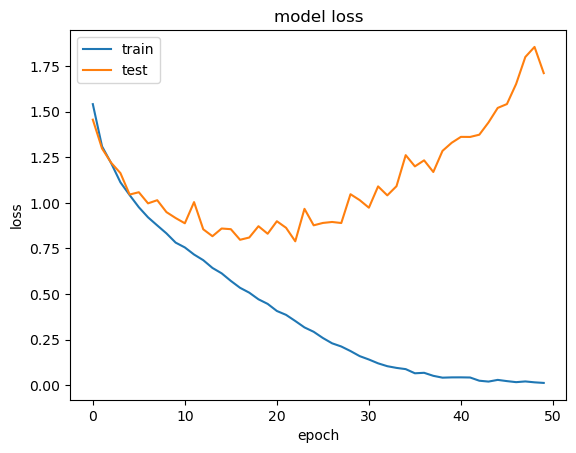

In [242]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Saving the model

In [281]:
# Hiding legacy warnings
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

tf.get_logger().setLevel('ERROR')
model_name = 'Emotion_Voice_Detection_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

Saved trained model


In [244]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

## Loading the model

In [245]:
# loading json and creating model
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
compile_metrics: 71.17%


## Testing one file

In [246]:
data, sampling_rate = librosa.load('03-01-03-01-02-01-03.wav')

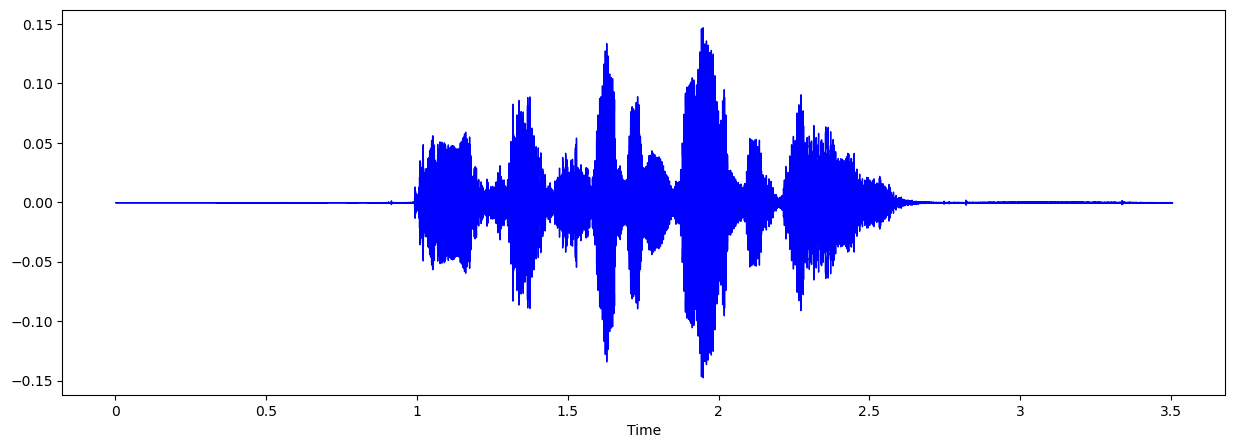

In [247]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate, color="blue")

In [248]:
X, sample_rate = librosa.load('03-01-03-01-02-01-03.wav', res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T

In [251]:
livedf2

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,-54.51495,-54.51495,-54.51495,-54.526299,-54.5378,-54.706455,-54.679832,-54.555088,-54.51495,-54.517647,...,-48.660702,-47.733665,-49.023418,-49.438839,-48.092144,-46.47366,-45.533134,-43.896019,-47.097549,-50.292961


In [252]:
twodim= np.expand_dims(livedf2, axis=2)

In [253]:
# Running model on the file
livepreds = loaded_model.predict(twodim, batch_size=32, verbose=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [254]:
livepreds

array([[2.0369938e-04, 1.2089986e-04, 4.8013243e-07, 7.6074189e-06,
        6.2241312e-04, 1.3700840e-05, 1.4805409e-09, 6.9334157e-02,
        9.2944479e-01, 2.5226737e-04]], dtype=float32)

In [282]:
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()
livepredictions = (lb.inverse_transform((liveabc)))
livepredictions

array(['male_happy'], dtype=object)